In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats= np.random.uniform(-90.000,90.000, size=1500)
lngs=np.random.uniform(-90.000,90.000,size=1500)
lats_lngs= zip(lats,lngs)
lats_lngs

In [3]:
#add the lats and lngs to a list
coordinates=list(lats_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities=[]
#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city is unique add to the list
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)
        


616

In [6]:
# Import the requests library
import requests
#Import the API Key
from config import weather_api_key

In [7]:
# Starting the URL for Weather Map API Call
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key


In [8]:
# Import the datetime module from the datetime library
from datetime import datetime


In [9]:
# Creat an empty list to hold the weather data
city_data=[]
#print the beginning of the logging 
print("Beginning Data Retrieval   ")
print("---------------------------")
#create counters
record_count=1
set_count=1


Beginning Data Retrieval   
---------------------------


In [10]:
#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50==0 and i>=50):
        set_count+=1
        record_count=1
    #Create endpoint URL with each city
    
    city_url= url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count
    record_count+=1
#Run an API request for each of the cities
    try:
    #Parse the JSON and retrieve data
        city_weather= requests.get(city_url).json()
        #parse out the needed data
        city_lat=city_weather["coord"]["lat"]
        city_lng=city_weather["coord"]["lon"]
        city_max_temp=city_weather["main"]["temp_max"]
        city_humidity= city_weather["main"]["humidity"]
        city_clouds= city_weather["clouds"]["all"]
        city_wind= city_weather["wind"]["speed"]
        city_country=city_weather["sys"]["country"]
        #convert the data to ISO standard
        city_date=datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity":city_humidity,
                         "Cloudiness":city_clouds,
                         "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        #If an error is experienced, skip the city
    
    except:
        print("City not found. Skipping...")
        pass
    #Indicate the Data Loading is complete
print("-------------------------------")
print("Data Retrieval Complete        ")
print("-------------------------------")
    

Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | sembe
Processing Record 3 of Set 1 | sao filipe
Processing Record 4 of Set 1 | selma
Processing Record 5 of Set 1 | florianopolis
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | necochea
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | victoria
Processing Record 10 of Set 1 | karachi
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | verdun
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | ecoporanga
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | rudbar
Processing Record 19 of Set 1 | caucaia
Processing Record 20 of Set 1 | nouadhibou
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | saint anthony
Processing Record 23 of Set 1 | jiddah
City not found. Skipping...
Processing Record 2

Processing Record 32 of Set 4 | chapais
Processing Record 33 of Set 4 | rawah
Processing Record 34 of Set 4 | virginia beach
Processing Record 35 of Set 4 | brae
Processing Record 36 of Set 4 | hun
Processing Record 37 of Set 4 | ayagoz
Processing Record 38 of Set 4 | oudtshoorn
Processing Record 39 of Set 4 | goderich
Processing Record 40 of Set 4 | formoso do araguaia
City not found. Skipping...
Processing Record 41 of Set 4 | kargasok
Processing Record 42 of Set 4 | luena
Processing Record 43 of Set 4 | ust-tsilma
Processing Record 44 of Set 4 | westport
Processing Record 45 of Set 4 | gat
Processing Record 46 of Set 4 | zhob
Processing Record 47 of Set 4 | jos
Processing Record 48 of Set 4 | tefe
Processing Record 49 of Set 4 | andros town
Processing Record 50 of Set 4 | brasilia de minas
Processing Record 1 of Set 5 | kitui
Processing Record 2 of Set 5 | plouzane
Processing Record 3 of Set 5 | ystad
Processing Record 4 of Set 5 | hofn
Processing Record 5 of Set 5 | olinda
Processi

Processing Record 24 of Set 8 | morrope
Processing Record 25 of Set 8 | besancon
Processing Record 26 of Set 8 | banda aceh
Processing Record 27 of Set 8 | asayita
City not found. Skipping...
Processing Record 28 of Set 8 | kolno
Processing Record 29 of Set 8 | san rafael
Processing Record 30 of Set 8 | sharan
Processing Record 31 of Set 8 | esna
Processing Record 32 of Set 8 | cabimas
Processing Record 33 of Set 8 | krasnoselkup
Processing Record 34 of Set 8 | saint-augustin
Processing Record 35 of Set 8 | nalut
Processing Record 36 of Set 8 | columbus
Processing Record 37 of Set 8 | camara de lobos
Processing Record 38 of Set 8 | cururupu
Processing Record 39 of Set 8 | bo
City not found. Skipping...
Processing Record 40 of Set 8 | monte santo de minas
Processing Record 41 of Set 8 | langres
Processing Record 42 of Set 8 | yellandu
Processing Record 43 of Set 8 | skibbereen
Processing Record 44 of Set 8 | comodoro rivadavia
Processing Record 45 of Set 8 | grand gaube
Processing Recor

Processing Record 14 of Set 12 | podor
Processing Record 15 of Set 12 | flores
Processing Record 16 of Set 12 | buritis
Processing Record 17 of Set 12 | gilbues
Processing Record 18 of Set 12 | puerto ayora
Processing Record 19 of Set 12 | puerto asis
Processing Record 20 of Set 12 | waddan
Processing Record 21 of Set 12 | latehar
Processing Record 22 of Set 12 | atasu
Processing Record 23 of Set 12 | warrington
Processing Record 24 of Set 12 | qandala
Processing Record 25 of Set 12 | inongo
Processing Record 26 of Set 12 | taltal
Processing Record 27 of Set 12 | yirol
City not found. Skipping...
Processing Record 28 of Set 12 | imeni babushkina
Processing Record 29 of Set 12 | carnarvon
Processing Record 30 of Set 12 | bafoulabe
Processing Record 31 of Set 12 | dalvik
Processing Record 32 of Set 12 | pasni
Processing Record 33 of Set 12 | nexo
Processing Record 34 of Set 12 | oussouye
Processing Record 35 of Set 12 | nara
Processing Record 36 of Set 12 | livingstonia
Processing Record

In [11]:
len(city_data)

564

In [12]:
#Convert the city_data dictionary to a datafram
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,45.28,68,42,2.26,ZA,2021-10-17 22:27:03
1,Sembe,1.6481,14.5806,70.97,96,91,2.21,CG,2021-10-17 22:27:42
2,Sao Filipe,14.8961,-24.4956,78.82,77,0,4.45,CV,2021-10-17 22:27:43
3,Selma,36.5708,-119.6121,86.92,16,1,6.91,US,2021-10-17 22:25:18
4,Florianopolis,-27.6146,-48.5012,60.03,86,75,2.30,BR,2021-10-17 22:27:44
5,Punta Arenas,-53.1500,-70.9167,50.11,71,0,26.46,CL,2021-10-17 22:24:15
6,Necochea,-38.5473,-58.7368,53.04,77,54,7.70,AR,2021-10-17 22:27:45
7,Mar Del Plata,-38.0023,-57.5575,57.09,22,0,5.01,AR,2021-10-17 22:24:38
8,Victoria,22.2855,114.1577,72.25,80,98,8.99,HK,2021-10-17 22:25:46
9,Karachi,24.9056,67.0822,76.82,78,0,5.75,PK,2021-10-17 22:27:46


In [13]:
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]


In [14]:
#Add new column data to new and or overwrite the datatframe
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-10-17 22:27:03,-34.5322,20.0403,45.28,68,42,2.26
1,Sembe,CG,2021-10-17 22:27:42,1.6481,14.5806,70.97,96,91,2.21
2,Sao Filipe,CV,2021-10-17 22:27:43,14.8961,-24.4956,78.82,77,0,4.45
3,Selma,US,2021-10-17 22:25:18,36.5708,-119.6121,86.92,16,1,6.91
4,Florianopolis,BR,2021-10-17 22:27:44,-27.6146,-48.5012,60.03,86,75,2.30
5,Punta Arenas,CL,2021-10-17 22:24:15,-53.1500,-70.9167,50.11,71,0,26.46
6,Necochea,AR,2021-10-17 22:27:45,-38.5473,-58.7368,53.04,77,54,7.70
7,Mar Del Plata,AR,2021-10-17 22:24:38,-38.0023,-57.5575,57.09,22,0,5.01
8,Victoria,HK,2021-10-17 22:25:46,22.2855,114.1577,72.25,80,98,8.99
9,Karachi,PK,2021-10-17 22:27:46,24.9056,67.0822,76.82,78,0,5.75


In [15]:
#Create the output file(CSV)
output_data_file= "weather_data/cities.csv"
#export the city_data into a CSV"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
#Extract relevant fields from the DataFrame for plotting
lats=city_data_df["Lat"]
max_temps= city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness= city_data_df["Cloudiness"]
wind_speed= city_data_df["Wind Speed"]

In [27]:
#Import the time module
import time

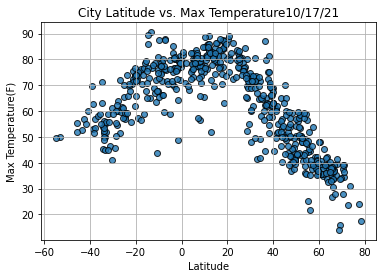

In [28]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats,max_temps, edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig1.png")
plt.show()

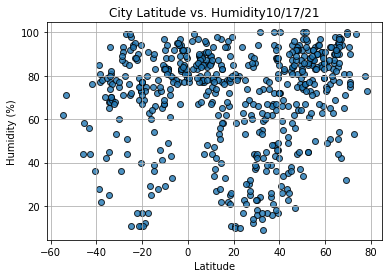

In [29]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats,humidity, edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig2.png")
plt.show()

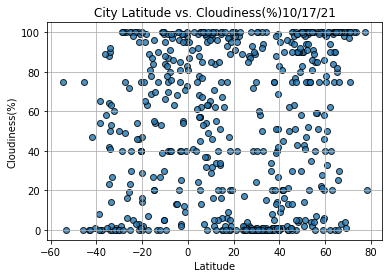

In [30]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats,cloudiness, edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness(%)" + time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig3.png")
plt.show()

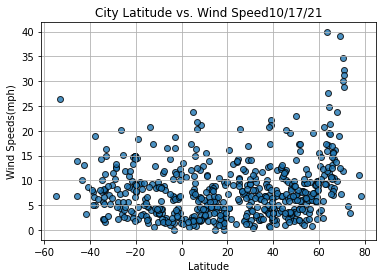

In [31]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats,wind_speed, edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speeds(mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig4.png")
plt.show()

In [39]:
#import linregress
from scipy.stats import linregress

#Create a function to createperform linear regression on the weather data
#and plot a regression line and the equation with the data
def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
   
    #run regression on hemisphere weather data
    (slope,intercept,r_value,p_value,std_err)=linregress(x_values,y_values)
    #Calculate the regression line y_values
    regress_values=x_values*slope +intercept
    #Get the equation of the line
    line_eq="y= "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [40]:
index13= city_data_df.loc[13]
index13

City                       Verdun
Country                        FR
Date          2021-10-17 22:27:48
Lat                         49.25
Lng                        5.3333
Max Temp                     43.7
Humidity                       85
Cloudiness                    100
Wind Speed                   4.14
Name: 13, dtype: object

In [41]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()
                  

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Sembe,CG,2021-10-17 22:27:42,1.6481,14.5806,70.97,96,91,2.21
2,Sao Filipe,CV,2021-10-17 22:27:43,14.8961,-24.4956,78.82,77,0,4.45
3,Selma,US,2021-10-17 22:25:18,36.5708,-119.6121,86.92,16,1,6.91
8,Victoria,HK,2021-10-17 22:25:46,22.2855,114.1577,72.25,80,98,8.99
9,Karachi,PK,2021-10-17 22:27:46,24.9056,67.0822,76.82,78,0,5.75


In [44]:
northern_hemi_df= city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df= city_data_df.loc[(city_data_df["Lat"] <= 0)]

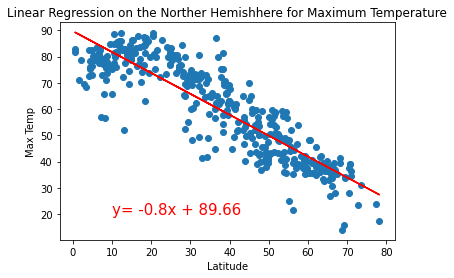

In [47]:
#Linear regression on the Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values,y_values,
                      'Linear Regression on the Norther Hemishhere for Maximum Temperature','Max Temp',(10,20))

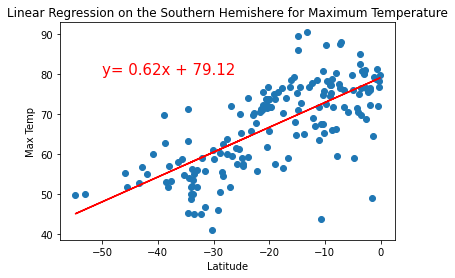

In [50]:
# Linear regression on the Southern Hemishpere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemishere for Maximum Temperature',"Max Temp",(-50,80))

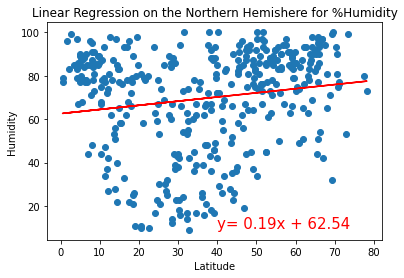

In [51]:
# Linear regression on the Northern Hemishpere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemishere for %Humidity',"Humidity",(40,10))

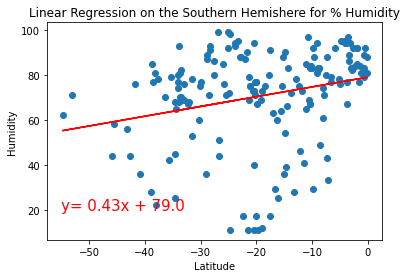

In [58]:
# Linear regression on the Southern Hemishpere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemishere for % Humidity',"Humidity",(-55,20))

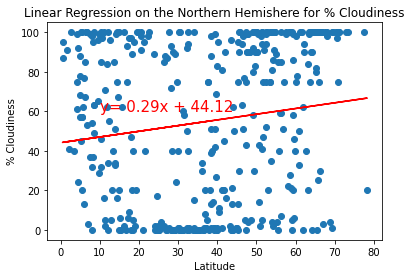

In [62]:
# Linear regression on the Northern Hemishpere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemishere for % Cloudiness',"% Cloudiness",(10,60))

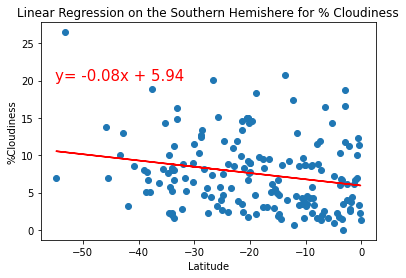

In [69]:
# Linear regression on the Southern Hemishpere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemishere for % Cloudiness',"%Cloudiness",(-55,20))

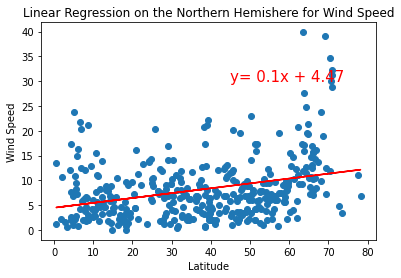

In [66]:
# Linear regression on the Northern Hemishpere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemishere for Wind Speed',"Wind Speed",(45,30))

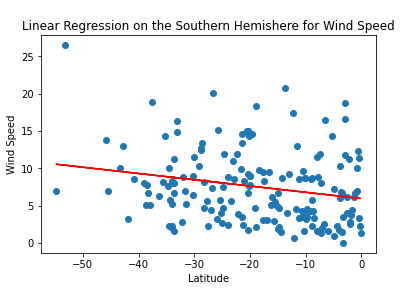

LinregressResult(slope=-0.0838732358435374, intercept=5.938307700739506, rvalue=-0.2191619373811495, pvalue=0.003976862136862292, stderr=0.028722755449383713, intercept_stderr=0.6531932116495562)

In [76]:
# Linear regression on the Southern Hemishpere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemishere for Wind Speed',"Wind Speed",(-55,30))

linregress(x_values,y_values)